# Generadores de números aleatorios


No ha sido demostrado que una computadora clásica más un generador de números aleatorios de lugar a un modelo de computación más poderoso que el de una computadora clásica sola. Sin embargo, en muchos casos los mejores algoritmos que tenemos usan números aleatorios. Dos ejemplos famosos son test de primalidad [AKS](https://es.wikipedia.org/wiki/Test_de_primalidad_AKS) y el método de Montecarlo que permite dar una solución (en general aproximada) a una gran variedad de problemas *difíciles*.

Los Generadores de Números Aleatorios (RNG por sus siglas en inglés) buscan obtener números aleatorios usando una computadora clásica determinista. Aunque esto pueda parecer imposible a primera vista, [vimos que el mapeo logístico](https://colab.research.google.com/drive/14Cr_IU-EXKTNkUo0xEZTXGQ2QUMJM1YX?usp=sharing) produce una sucesión de números que parecen aleatorios, si el parámetro del mapeo se elige en la región caótica.

De hecho la base de los *generadores lineales congruentes* es una especie de mapeo discreto que permite obtener el número entero "aleatorio" $r_{n+1}$ a partir del anterior.
$$
r_{n+1}= (a r_n +c)\mod(m)
$$
donde $a$, $c$ y $m$ son números enteros y $\mod(m)$ indica que hay que quedarse con el resto de dividir por $m$.

Para comenzar es necesario contar con una semilla $r_0$.



###El siguiente programa implementa un generador linear congruente

La elección de los parámetros $a$, $c$ y $m$ es muy importante.

Hay que tener en cuenta que:

- El número máximo que se puede obtener es $m-1$.
- La secuencia puede tener un período que es mucho menor que $m$.
- Si usamos siempre la misma semilla, para un generador dado, obtenemos siempre la misma secuencia de números.


In [1]:
# Parámetros del generador lineal congruente
a = 25
c = 3
m = 2**16
semilla = 7

def glc(a, c, m, semilla):
    while True:
        semilla = (a * semilla + c) % m
        yield semilla

# Inicializa el generador
rand_gen = glc(a, c, m, semilla)

for _ in range(100):
    print(next(rand_gen), end=' ')

178 4453 45792 30691 46382 45441 21916 23615 554 13853 18648 7451 55206 3897 31892 10871 9634 44245 57552 62547 56350 32497 25996 60079 60186 62861 64200 32139 17046 32937 36996 7399 53906 36933 5824 14531 35598 37985 32124 16671 23562 64765 46264 42491 13702 14873 44148 55127 1922 48053 21680 17715 49662 61905 40300 24463 21754 19565 30376 38507 45174 15241 53348 22983 50290 12069 39584 6563 33006 38721 50524 17919 54762 58333 16536 20187 45926 34041 64596 42039 2402 60053 59536 46611 51166 33969 62796 62575 57050 49997 4744 53067 15958 5737 12356 46759 54866 60933 16000 6787 

Una primera observación de estos números es que van alternando entre par e impar, lo que no es un comportamiento esperado para números aleatorios. Si lo vemos en términos de la representación binaria, el bit menos representativo está alternando todo el tiempo entre $0$ y $1$. Este es un problema común en esta clase de generadores por lo que se suelen descartar los bits menos representativos.

Hay otros problemas de estos generadores que también tienen que ver con las correlaciones entre números sucesivos. Una forma de ver esto es graficando en un plano dos números como las coordenadas $x$ e $y$. Para eso dividimos por $m$ que lleva nuestros números al intervalo $(0,1)$, ya que $m-1$ el número máximo que se puede obtener.

### Correlaciones entre números sucesivos

El siguiente programa grafica un punto

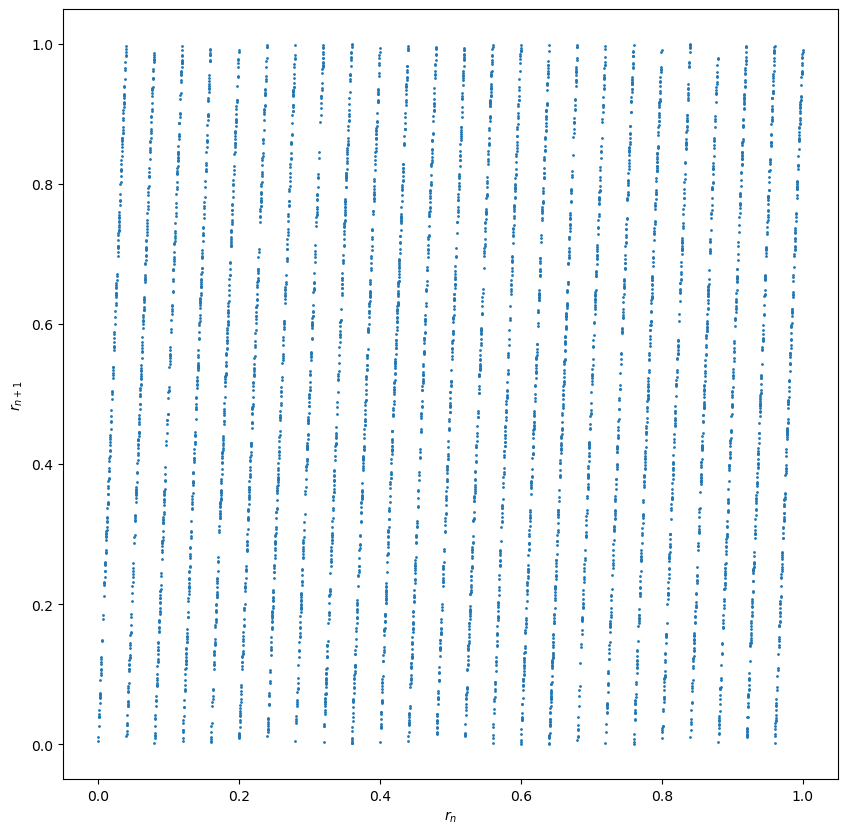

In [2]:
# @title
import matplotlib.pyplot as plt

a = 25
c = 3
m = 2**16
semilla= 7

def lcg(a, c, m, semilla):
    while True:
        semilla= (a * semilla + c) % m
        yield semilla / m

rand_gen = lcg(a, c, m, semilla)

# Genera num_rn números
num_rn = 5000
numeros = [next(rand_gen) for _ in range(num_rn)]

# Figura
plt.figure(figsize=(10, 10))
plt.scatter(numeros[:-1], numeros[1:], s=1)
plt.xlabel('$r_n$')
plt.ylabel('$r_{n+1}$')
plt.show()


Evidentemente el generador no está dado un resultado satisfactorio. Eligiendo con cuidado los parámetros del generador se pueden obtener resultados mucho mejores, en los que las correlaciones son menos evidentes.


### Calidad de los generadores de números aleatorios
La calidad de un RNG puede evaluarse en base a varios factores, en particular la uniformidad y la independencia.

- La uniformidad se refiere a la distribución de los números generados. Un buen RNG debe producir números que estén distribuidos de manera uniforme dentro de un rango dado. En general partimos de generadores que producen números en el rango $(0,1)$ con igual probabilidad.

- La independencia significa que cada número generado no depende de los números generados anteriormente. En otras palabras, conocer uno o más números generados previamente no debería dar ninguna información sobre el próximo número. Hay que tener en cuenta también que en muchos casos nos interesa poder reproducir exactamente los resultados que obtenemos y para eso, o bien guardamos toda la secuencia de números o usamos un generador que dado un número inicial (semilla) produce siempre la misma secuencia de números.

Los RNG son muy usados en criptografía, donde se necesita que sean de muy buena calidad. Eso ha impulsado el desarrollo de RNG y hay una gran variedad disponible que difieren en la calidad de los números pseudoaleatorios y en la velocidad para producirlos.

Aunque en general los RNG más populares han pasado una serie de tests estadísticos, no hay garantía de que sean adecuados para el problema que nos interesa. Al final, lo mejor que podemos hacer es usar más de un generador y controlar que la física que estamos obteniendo no dependa del mismo.

* “The most prudent policy for a person to follow is to run each
Monte Carlo program at least twice using quite different sources of random numbers,
before taking the answers of the program seriously; this not only will give an indication
of the stability of the results, it will also guard against the danger of trusting in a generator with hidden deficiencies. (Every random number generator will fail in at least one
application.)” Knuth, D.E. 1981, Seminumerical Algorithms, 2nd ed., vol. 2 of The Art of Computer Programming
(Addison-Wesley)

Python y C++11 tienen generadores basados en el algoritmo de Mersene Twister que tiene un periodo enorme y ha pasado varios tests estadísticos. Aunque no es apto para criptografía, es un generador usado en muchas aplicaciones.

La librerías ```random``` de [c++](https://cplusplus.com/reference/random/normal_distribution/) y de [python](https://numpy.org/doc/stable/reference/random/generated/numpy.random.normal.html) son consideradas como de "alta calidad" y permiten obtener muestras de diferentes distribuciones.

El generador que viene en la librería stdlib.h de C **no es muy bueno**, pero hay generadores disponibles (por ejemplo ```ran2``` del Numerical Recipes). O para una solución mejor y más rápida está la familia [PCG](https://www.pcg-random.org/)
que usa generadores congruentes combinando descarte de bits menos significativos y un reordenamiento de bits que se elige de acuerdo a los bits más significativos.





### Secuencia de tiradas de moneda
1. Creamos primero una secuencia de 30 tiradas de moneda como un experimento mental. Esto es, usando nuestro cerebro como un generador de números al aleatorios.
2. Ahora la generamos la misma secuencia con la computadora:


In [ ]:
import random
print("".join(random.choice(['C', 'S']) for _ in range(30)))

SCSSSSSSSSCSCCSSCSSCCCCSCSSSCC


es interesante ver en cada secuencia si aparecen al menos una vez $4$ o $5$ caras o secas consecutivas. La probabilidades son $\sim 0.9$ y $0.61$ respectivamente.

Es importante tener en cuenta que ningún generador de números aleatorios puede ser realmente "perfecto".

![Dilbert](https://www.americanscientist.org/sites/americanscientist.org/files/20144141249210337-2014-05TechnologueFp170.jpg)

[Este artículo](https://www.americanscientist.org/article/the-quest-for-randomness) tiene una discusión interesante sobre qué significa que una secuencia de números sea aleatoria.


### Generadores de Números Aleatorios Verdaderos:

También conocidos como generadores aleatorios de hardware, estos producen aleatoriedad a partir de procesos físicos, como el ruido electrónico o la desintegración radiactiva. Dado que la fuente de aleatoriedad es un proceso físico, son no deterministas, e incluso si se repite el proceso, los resultados no serán los mismos.

Los procesos más fiables se basan en la física cuántica, que es fundamentalmente aleatoria. De hecho, la aleatoriedad intrínseca del comportamiento de las partículas subatómicas a nivel cuántico es un proceso completamente aleatorio. Al vincular el resultado de un RNG al comportamiento aleatorio de una partícula cuántica, es posible garantizar un sistema verdaderamente imparcial e impredecible.

Algunos CPU (Intel, AMD) tienen un generador de números aleatorios de hardware, que se puede utilizar para generar la semilla de generadores pseudoaleatorios que son muchos más rápidos. En general la dirección de memoria de una variable es suficiente para generar la semilla del generador. Generarla a partir del tiempo actual puede ser problemático para procesos en paralelo.


# Distribuciones de probabilidad

En general los RNG producen una distribución uniforme, pero podemos usar varias técnicas para obtener la distribución que necesitemos. Además tanto C++ como Python tienen librerías para generar una variedad de distribuciones de uso común como la gaussiana o la de Poisson.



## Método del rechazo

Supongamos que tenemos $K$ posibilidades diferentes, cada una con una probabilidad $p_i$ ($i=1,\ldots,K$), con $\sum_i p_i=1$.

Para obtener una variable aleatoria que tome el valor $i$ con probabilidad $p_i$:

- Tomamos $P_{max}=\max(p_i)$.
- Elegimos un número entero al azar $\ell$ entre $1$ y $K$ y un número real
 $p$ al azar entre $0$ y $P_{max}$.
- Si $p<p_\ell$ elegimos $\ell$, en otro caso rechazamos y volvemos a comenzar.

En el siguiente código se muestra un ejemplo con: $K=5$ y
$p_1=0.1$, $p_2=0.5$, $p_3=0.3$, $p_4=0.05$
y $p_5=0.05$.

In [ ]:
# @title
import random

probs   = [0.1, 0.5, 0.3, 0.05, 0.05]
cuentas = [0.0, 0.0, 0.0, 0.0, 0.0]

pmax = max(probs)

num_muestras = 1000000

rechazo = 0
for _ in range(num_muestras):
    k = random.randint(0,len(probs)-1)
    ell = random.uniform(0,pmax)
    if(ell < probs[k]):
        cuentas[k] += 1
    else:
        rechazo += 1

for i in range(len(probs)):
    cuentas[i] /= (num_muestras-rechazo)
    print(probs[i], cuentas[i])




0.1 0.09992024381889597
0.5 0.5001437611414885
0.3 0.30027577137228134
0.05 0.04970135185476875
0.05 0.049958871812565475


## Método de la torre

Podemos modificar la idea anterior armando una *torre* de probabilidades:
$$
\begin{align}
\Pi_0&=0\\
\Pi_1&=\Pi_0+p_1=0.1\\
\Pi_2&=\Pi_1+p_2=0.6\\
\Pi_3&=\Pi_2+p_3=0.9\\
\Pi_4&=\Pi_3+p_4=0.95\\
\Pi_5&=\Pi_4+p_5=1\\
\end{align}
$$

y luego si obtenemos un número aleatorio $p$ entre cero y uno, seleccionamos el valor de $l$ tal que $p$ queda en el intervalo tal que $\Pi_{l-1}<p\leq \Pi_{l}$. La ventaja de este método es que no tenemos rechazos, la desventaja es que tenemos que buscar el intervalo correcto para cada $p$. Para esto último podemos usar el método de la bisección.


### Cambio de variables bajo el signo de la integral
Estos procedimentos se pueden usar de manera análoga si en lugar de una variable discreta $i$ tenemos una continua $y$ con una distribución $P(y)$.

El método de la torre en el límite del continuo permite obtener una distribución a partir de otra haciendo un cambio de variable. Si $y=f(x)$ donde $x$ es una variable aleatoria con distribución de probabilidad $P(x)$ y $f(x)$ es una función univaluada y diferenciable, entonces podemos obtener la distribución de probabilidad de $y$ de:
$P(y)=\frac{P(x)}{|f'(x)|}$. Esto sale de hacer un cambio de variables bajo el signo de la integral.

### Distribución exponencial
Supongamos que tenemos una variable aleatoria $y\geq 0$ con distribución de probabilidad $P(y)=e^{-y}$. La probabilidad total es $1$:
$$
\int_0^\infty dy\,e^{-y}=1
$$

Hacemos el cambio de variables $x=e^{-y}$ y nos queda
$$
\int_0^1 dx=1
$$
por lo que $x$ es una variable aleatoria con distribución uniforme(0,1). Invirtiendo podemos obtener muestras de la distribución exponencial
$$
y=-\ln(x)
$$
a partir de la distribución uniforme.




## Distribución Gaussiana

En muchas aplicaciones necesitamos números aleatorios con una distribución gaussiana.
$$
P(x) =\frac{1}{\sqrt{2\pi}} \exp \left(-x^2/2\right)
$$

Sabemos por el teorema central del límite que la distribución de probabilidad de la suma de variable aleatorias independientes tiende a una gaussiana.

Si sumamos $K$ variables aleatorias sacadas de una distribución uniforme $[-1,1]$. Sabemos que:
$$
\mu =\int_{-1}^1 dx x \frac{1}{2}=0
$$
y
$$
\sigma_u^2=\int_{-1}^1 dx x^2 \frac{1}{2}=\frac{1}{3}
$$
Así que para $K\to \infty$ esperamos obtener una gaussiana  centrada en $\mu=0$ y de ancho $\sigma=\sqrt{K}\sigma_u=\sqrt{\frac{K}{3}}$.

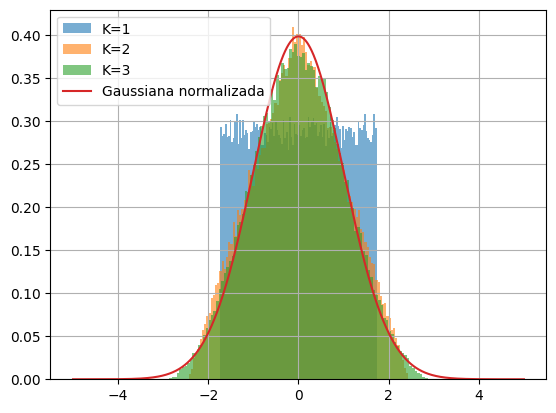

In [ ]:
# @title
import numpy as np
import matplotlib.pyplot as plt

# Número de muestras
num_muestras = 100000

for K in range(1, 4):
    # Genera K * num_muestras de números aleatorios en [-1, 1]
    rand_nums = np.random.uniform(-1, 1, (K, num_muestras))

    # Suma los K valores para cada muestra
    sums = np.sum(rand_nums, axis=0)

    # Normaliza para mantener std_dev = 1
    # El factor 3 viene de la varianza de la distribución uniforme
    sums /= np.sqrt(K/3.0)

    # Grafica el histograma para cada k
    plt.hist(sums, bins=100, density=True, alpha=0.6, label=f'K={K}')

# Grafica la gaussiana normalizada como comparación
x = np.linspace(-5, 5, 1000)
plt.plot(x, np.exp(-x**2/2.0)/np.sqrt(2*np.pi), label='Gaussiana normalizada')

plt.legend()
plt.grid(True)
plt.show()


vemos que para unas pocas variables aleatorias sumadas ($K$ chico) la distribución ya se parece mucho a una gaussiana. El valor más grande que puede aparecer está determinado por el número $K$ de variables aleatorias. En cambio, para la distribución gaussiana, aunque la probabilidad de un $|x| \gg 1$ es exponencialmente chica, es finita. Esto puede traer problemas si necesitamos un número muy grande de valores con distribución gaussiana.


### Método de Box-Muller para la distribución gaussiana

Supongamos que queremos obtener la integral
$$
I = \frac{1}{\sqrt{2 \pi}}\int_{-\infty}^{\infty}dx e^{-x^2/2}.
$$
la elevamos al cuadrado y obtenemos
$$
\begin{align}
I^2 &= \frac{1}{2 \pi}\int_{-\infty}^{\infty}dx e^{-x^2/2}\int_{-\infty}^{\infty}dy e^{-y^2/2}\\
&= \frac{1}{2 \pi}\int_{-\infty}^{\infty}dx\, dy\, e^{-(x^2+y^2)/2}.
\end{align}
$$
cambiamos a coordenadas polares
$$
\begin{align}
x&=r\cos(\theta)\\
y&=r\sin(\theta)\\
\end{align}
$$
y el Jacobiano de la transformación es simplemente $r$, así que nos queda
$$
\begin{align}
I^2  &= \frac{1}{2 \pi}\int_0^{2\pi}d\theta\,\int_{0}^{\infty} dr\, r\, e^{-r^2/2}.
\end{align}
$$
En la integral de la derecha substituimos $u=r^2/2$ y nos queda:
\begin{align}
I^2  &= \frac{1}{2 \pi}\int_0^{2\pi}d\theta\,\int_{0}^{\infty} du\, e^{-u}.
\end{align}
La integral de la izquierda es $2\pi$ y la de la derecha es $1$, por lo que la integral $I$ es igual a $1$. Además, la distrubución de $\theta$ es uniforme y la de $u$ exponencial.


Utilizando esto ([Método de Box-Muller](https://es.wikipedia.org/wiki/M%C3%A9todo_de_Box-Muller)) es posible obtener una distribución gaussiana como se muestra en el código siguiente (ver también el Numerical Recipes para una versión en C):


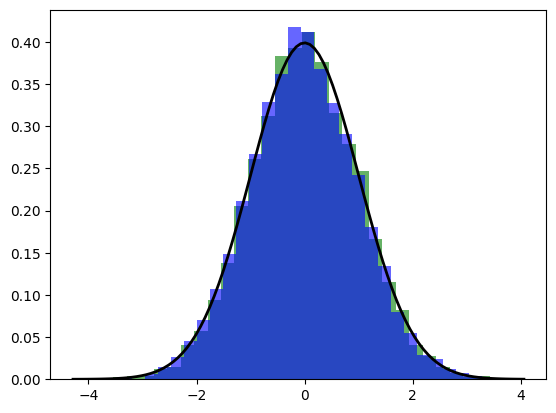

In [ ]:
# @title
import numpy as np
import matplotlib.pyplot as plt

# Número de muestras
N = 10000

U1 = np.random.uniform(0, 1, N)
U2 = np.random.uniform(0, 1, N)

# Transformación de Box-Muller
R = np.sqrt(-2.0 * np.log(U1))  # Radio
Theta = 2.0 * np.pi * U2  # Ángulo

# Crea variables con distribución gaussiana
X = R * np.cos(Theta)
Y = R * np.sin(Theta)

# Graficamos histogramas
plt.hist(X, bins=30, density=True, alpha=0.6, color='g')
plt.hist(Y, bins=30, density=True, alpha=0.6, color='b')

# Graficamos una Normal(0,1)
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = np.exp(-x**2 / 2) / np.sqrt(2*np.pi)
plt.plot(x, p, 'k', linewidth=2)

plt.show()
